In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", palette="pastel")

In [4]:
# Load the cleaned dataset
import pandas as pd

df_clean = pd.read_csv("cleaned_data.csv")

# Quick check
print("✅ Cleaned data loaded successfully!")
print(df_clean.shape)
df_clean.head()

✅ Cleaned data loaded successfully!
(148442, 12)


,orig_index,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
0,0,567335,AB FOODS POINT,Abohar,4.0,4808,322,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json
1,1,531342,Janta Sweet House,Abohar,4.4,3061,349,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json
2,2,158203,theka coffee desi,Abohar,3.8,715,409,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json
3,3,187912,Singh Hut,Abohar,3.7,613,225,"Fast Food,Indian",22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",Menu/187912.json
4,4,543530,GRILL MASTERS,Abohar,4.0,3859,500,"Italian-American,Fast Food",12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...",Menu/543530.json


C:\Users\kirut\AppData\Local\Temp\ipykernel_7588\1447696568.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette="viridis")


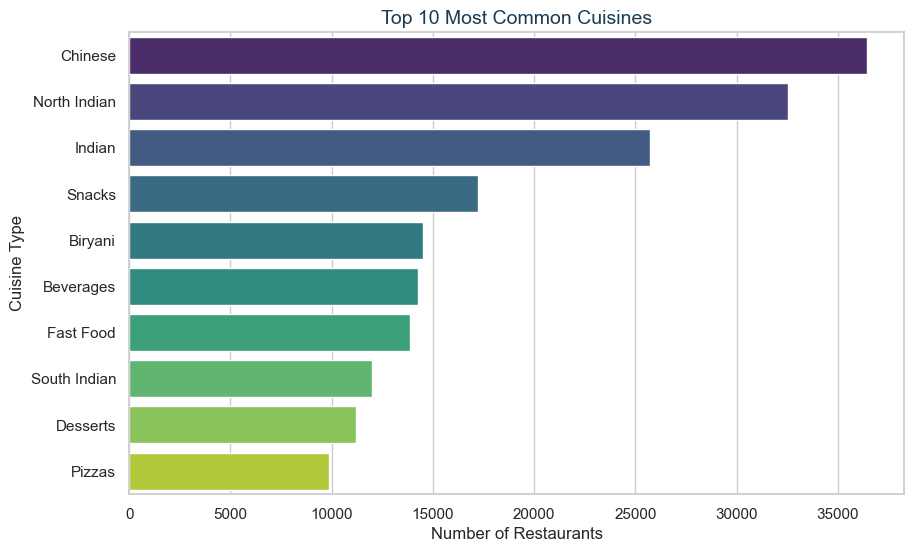

In [19]:
#Cuisine Popularity
top_cuisines = (
    df_clean['cuisine']
    .dropna()
    .str.split(',')
    .explode()
    .str.strip()
    .value_counts()
    .head(10)
)

plt.figure(figsize=(10,6))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette="viridis")
plt.title("Top 10 Most Common Cuisines", fontsize=14, color="#1B3C53")
plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisine Type")
plt.show()

C:\Users\kirut\AppData\Local\Temp\ipykernel_7588\3406379253.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_cost_city.values, y=avg_cost_city.index, palette="mako")


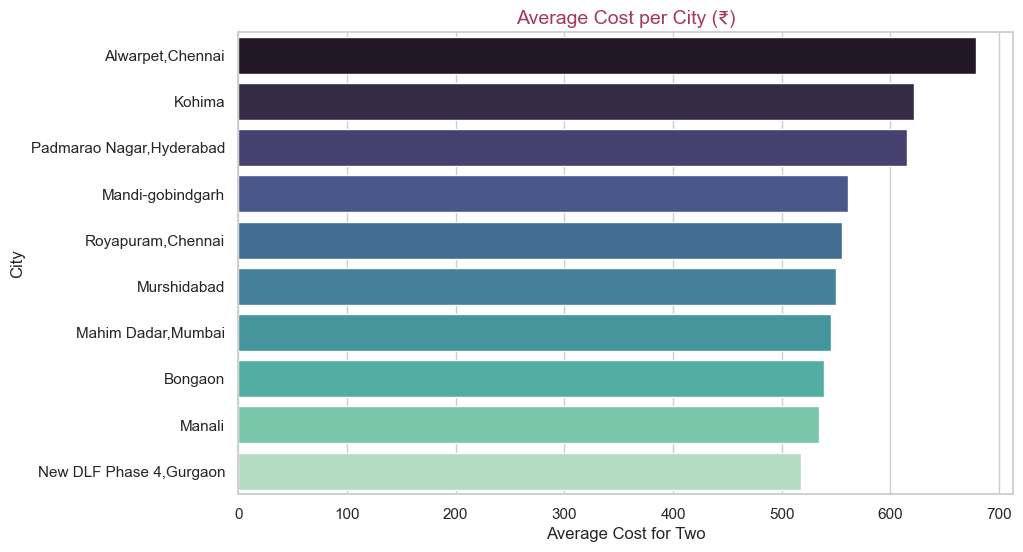

In [21]:
#Average Cost per City
avg_cost_city = df_clean.groupby('city')['cost'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_cost_city.values, y=avg_cost_city.index, palette="mako")
plt.title("Average Cost per City (₹)", fontsize=14, color="#A53860")
plt.xlabel("Average Cost for Two")
plt.ylabel("City")
plt.show()

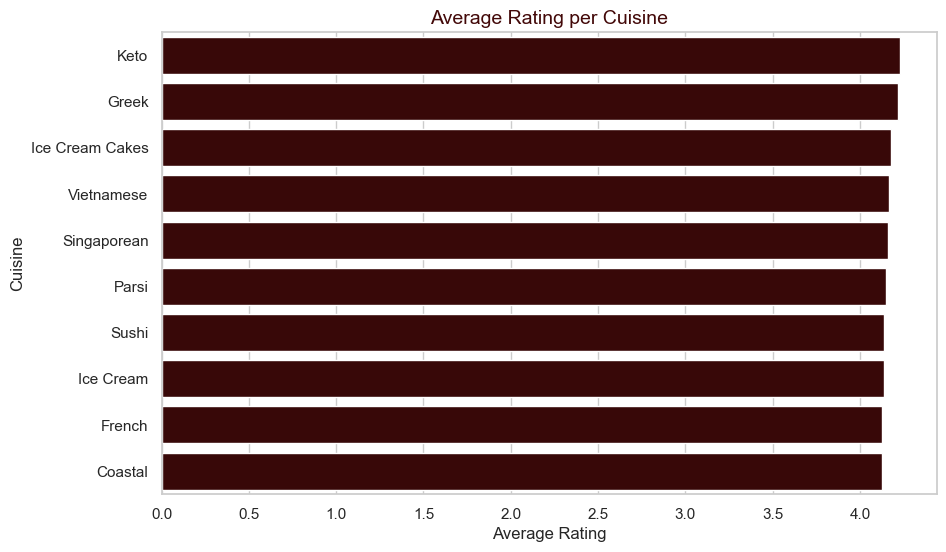

In [18]:
#Average Rating per Cuisine
avg_rating_cuisine = (
    df_clean.dropna(subset=['cuisine', 'rating'])
    .assign(cuisine=df_clean['cuisine'].str.split(','))
    .explode('cuisine')
    .groupby('cuisine')['rating']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_rating_cuisine.values, y=avg_rating_cuisine.index, color="#400000")
plt.title("Average Rating per Cuisine", fontsize=14, color="#430909")
plt.xlabel("Average Rating")
plt.ylabel("Cuisine")
plt.show()

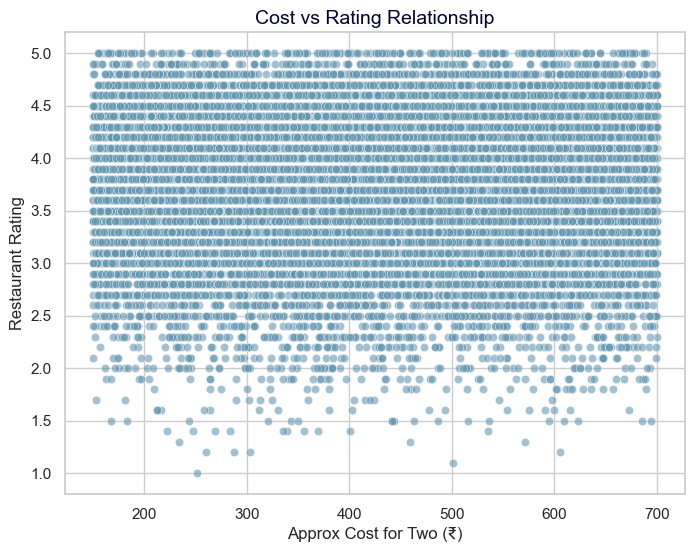

In [15]:
#Rating vs Cost Relationship
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_clean, x='cost', y='rating', color="#6497b1", alpha=0.6)
plt.title("Cost vs Rating Relationship", fontsize=14, color="#000435")
plt.xlabel("Approx Cost for Two (₹)")
plt.ylabel("Restaurant Rating")
plt.show()